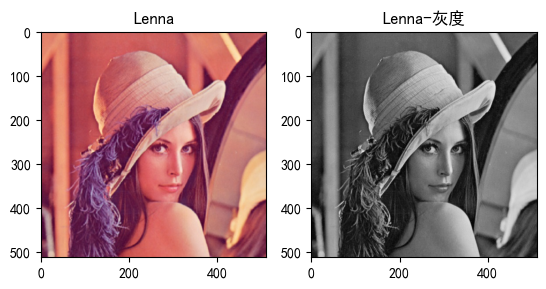

In [40]:
# 读取lena图并显示
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
# 中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取Lenna图
lena_gray = cv2.imread('Lenna-gray.jpg', cv2.IMREAD_GRAYSCALE)
lena = cv2.imread('Lenna.jpg')
# rgb转bgr
lena = cv2.cvtColor(lena, cv2.COLOR_RGB2BGR)
# 显示lena图
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.imshow(lena)
ax.set_title('Lenna')
ax = fig.add_subplot(1, 2, 2)
ax.imshow(lena_gray, cmap='gray')
ax.set_title('Lenna-灰度')
plt.show()

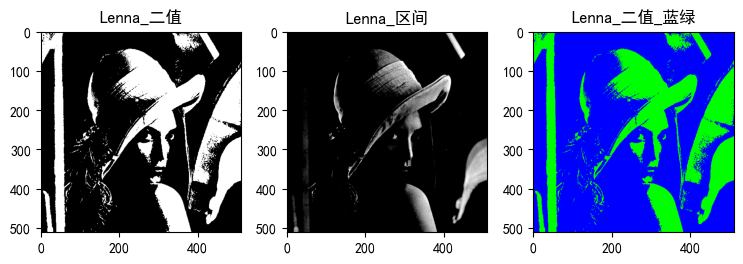

In [51]:
# 把lena的灰度图像显示为2值图像
lena_binary = np.where(lena_gray > 128, 255, 0)

# 蓝色和绿色来表示二值图像(黑色用蓝色代表，白	色用绿色代表)
lena_binary_bg = np.zeros_like(lena, dtype=np.uint8)
# 设置黑色用蓝色代表，白色用绿色代表
lena_binary_bg[lena_binary == 0] = [0, 0, 255]  # 黑色部分用蓝色表示
lena_binary_bg[lena_binary == 255] = [0, 255, 0]  # 白色部分用绿色表示
# 阈值切割到指定区间[150, 220]
lena_box = np.vectorize(lambda x: 150 if x < 150 else (220 if x > 220 else x))(lena_gray)

from PIL import Image
fig = plt.figure(figsize=(10, 10))  
ax = fig.add_subplot(1, 4, 1)
ax.imshow(lena_binary, cmap='gray')
ax.set_title('Lenna_二值')
Image.fromarray(lena_binary).convert('L').save("Lenna_二值.bmp", format="bmp")
Image.fromarray(lena_binary).convert('L').save("Lenna_二值.png", format="png")

ax = fig.add_subplot(1, 4, 2)
ax.imshow(lena_box, cmap='gray')
ax.set_title('Lenna_区间')
Image.fromarray(lena_box).convert('L').save("Lenna_区间.bmp", format="bmp")
Image.fromarray(lena_box).convert('L').save("Lenna_区间.png", format="png")

ax = fig.add_subplot(1, 4, 3)
ax.imshow(lena_binary_bg)
ax.set_title('Lenna_二值_蓝绿')
Image.fromarray(lena_binary_bg).save("Lenna_二值_蓝绿.bmp", format="bmp")
Image.fromarray(lena_binary_bg).save("Lenna_二值_蓝绿.png", format="png")

plt.tight_layout()
plt.show()

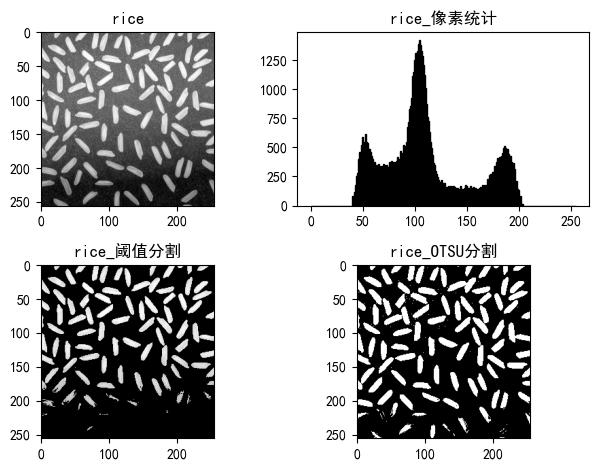

In [64]:
# 读取rice.png
rice = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)
# 显示rice图
fig = plt.figure()
ax = fig.add_subplot(2, 2, (1,1))
ax.imshow(rice, cmap='gray')
ax.set_title('rice')

# 统计像素
ax = fig.add_subplot(2, 2, (2,2))
ax.hist(rice.ravel(), bins=256, range=(0, 255), fc='k', ec='k')
ax.set_title('rice_像素统计')

# 阈值分割
shreshold = 150
rice_shreshold = np.where(rice < shreshold, 0, rice)
ax = fig.add_subplot(2, 2, (3,3))
ax.imshow(rice_shreshold, cmap='gray')
ax.set_title('rice_阈值分割')

#最佳阈值分割法,OTSU
# OTSU阈值分割
_, rice_otsu = cv2.threshold(rice, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ax = fig.add_subplot(2, 2, 4)
ax.imshow(rice_otsu, cmap='gray')
ax.set_title('rice_OTSU分割')


plt.tight_layout()
plt.show()

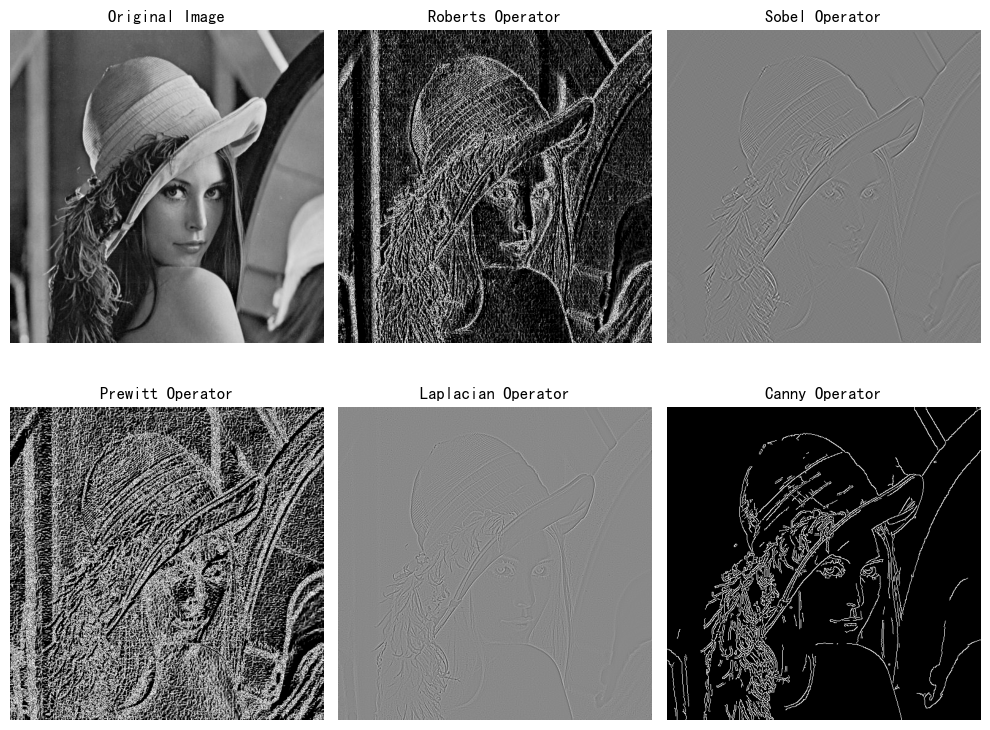

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取灰度图像
lena_gray = cv2.imread('Lenna-gray.jpg', cv2.IMREAD_GRAYSCALE)

# 创建一个Matplotlib图形
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

# 展示原图
axes[0, 0].imshow(lena_gray, cmap='gray')
axes[0, 0].set_title('Original Image')

# (1) Roberts算子
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, -1], [1, 0]])
roberts_edge = np.sqrt(cv2.filter2D(lena_gray, -1, roberts_x)**2 + cv2.filter2D(lena_gray, -1, roberts_y)**2)
axes[0, 1].imshow(roberts_edge, cmap='gray')
axes[0, 1].set_title('Roberts Operator')

# (2) Sobel算子
sobel_edge = cv2.Sobel(lena_gray, cv2.CV_64F, 1, 1, ksize=3)
axes[0, 2].imshow(sobel_edge, cmap='gray')
axes[0, 2].set_title('Sobel Operator')

# (3) Prewitt算子
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_edge = np.sqrt(cv2.filter2D(lena_gray, -1, prewitt_x)**2 + cv2.filter2D(lena_gray, -1, prewitt_y)**2)
axes[1, 0].imshow(prewitt_edge, cmap='gray')
axes[1, 0].set_title('Prewitt Operator')

# (4) Laplacian算子
laplacian_edge = cv2.Laplacian(lena_gray, cv2.CV_64F)
axes[1, 1].imshow(laplacian_edge, cmap='gray')
axes[1, 1].set_title('Laplacian Operator')

# (5) Canny算子
canny_edge = cv2.Canny(lena_gray, 100, 200)
axes[1, 2].imshow(canny_edge, cmap='gray')
axes[1, 2].set_title('Canny Operator')

# 显示所有子图
for ax in axes.ravel():
    ax.axis('off')

plt.tight_layout()
plt.show()


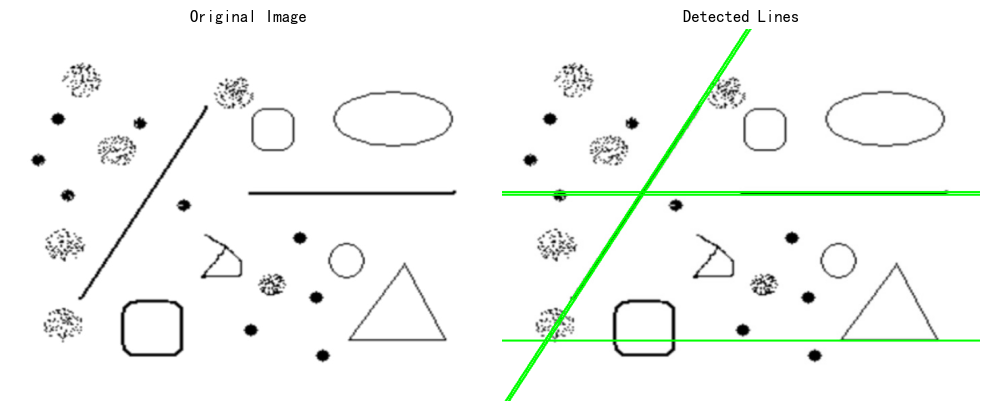

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread("linedetect.jpg", cv2.IMREAD_GRAYSCALE)
# 进行Canny边缘检测
edges = cv2.Canny(img, 50, 150, apertureSize=3)
# Hough变换
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)
# 创建一个彩色复制品来绘制结果
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
hough_space = np.zeros((180, int(np.sqrt(img.shape[0]**2 + img.shape[1]**2))), dtype=np.uint8)
# 绘制检测到的直线
for rho, theta in lines[:, 0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    hough_space[int(theta * 180 / np.pi), int(rho)] = 255
# 使用Matplotlib进行结果展示
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
axes[1].set_title('Detected Lines')
axes[1].axis('off')

plt.tight_layout()
plt.show()
